### Imports

In [1]:
import os
from pathlib import Path

In [2]:
import event_reader as helper

### Paths

In [3]:
SRC_DIR = Path.cwd()
ROOT_DIR = SRC_DIR.parent

DATA_DIR = os.path.join(ROOT_DIR, 'dataset')
PREPROCESSED_DIR = os.path.join(DATA_DIR, 'preprocessed')
CSV_PATH = os.path.join(DATA_DIR, 'csv_mappings', 'train.csv')

MODEL_DIR = os.path.join(ROOT_DIR, 'models')
BASELINE_DIR = os.path.join(MODEL_DIR, 'baselines_finetuned') 

### Set model to evaluate

In [4]:
model_type = 'custom_resnet' 
# alexnet # resnet # vgg16 # densenet # efficientnet
# custom_alexnet # custom_resnet # pretrained_alexnet

In [5]:
LOG_DIR = os.path.join(BASELINE_DIR, model_type, 'log')
RESULT_DIR = os.path.join(BASELINE_DIR, model_type, 'results')

### Reading event files

In [6]:
scalar_tags = helper.list_scalar_tags(LOG_DIR)

Available Scalar Tags:
Train/BatchLoss
Train/BatchAccuracy
Train/Loss
Train/Accuracy
Train/Learning Rate
Validation/BatchLoss
Validation/BatchAccuracy
Validation/Loss
Validation/Accuracy


In [7]:
all_metrics = helper.extract_all_metrics(LOG_DIR)
loss_accuracy_metrics = helper.extract_loss_and_accuracy(all_metrics)

### Plot loss and accuracy

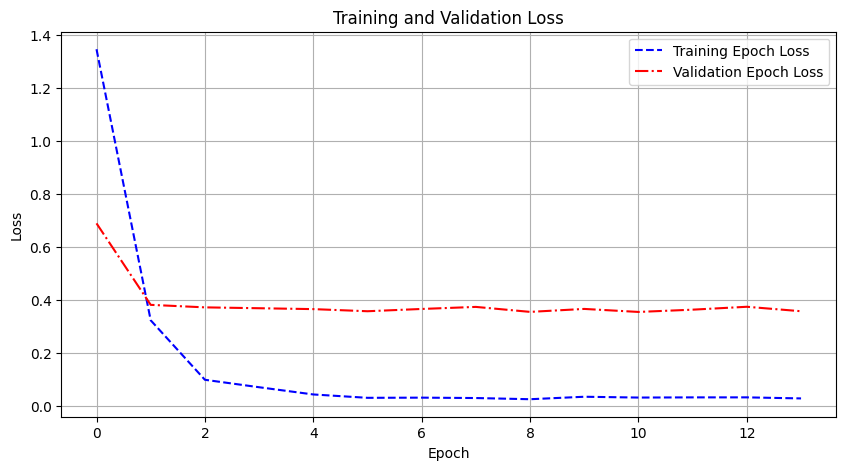

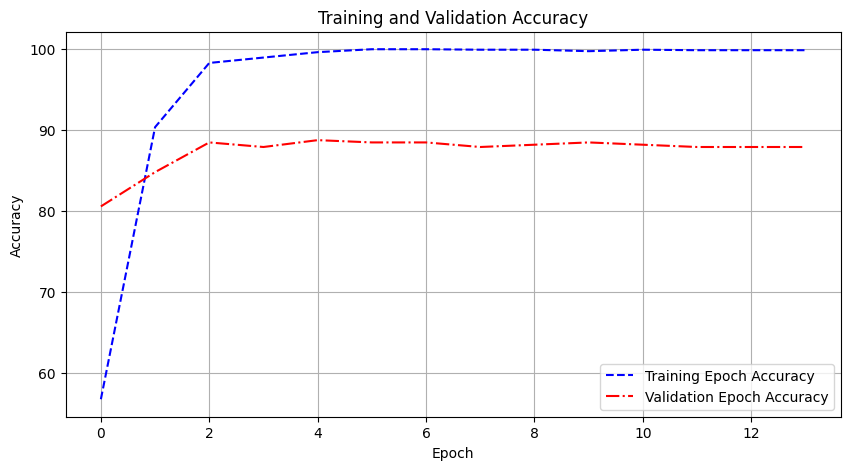

In [8]:
helper.plot_loss(loss_accuracy_metrics, use_batch_steps=False, save_path=RESULT_DIR)
helper.plot_accuracy(loss_accuracy_metrics, use_batch_steps=False, save_path=RESULT_DIR)

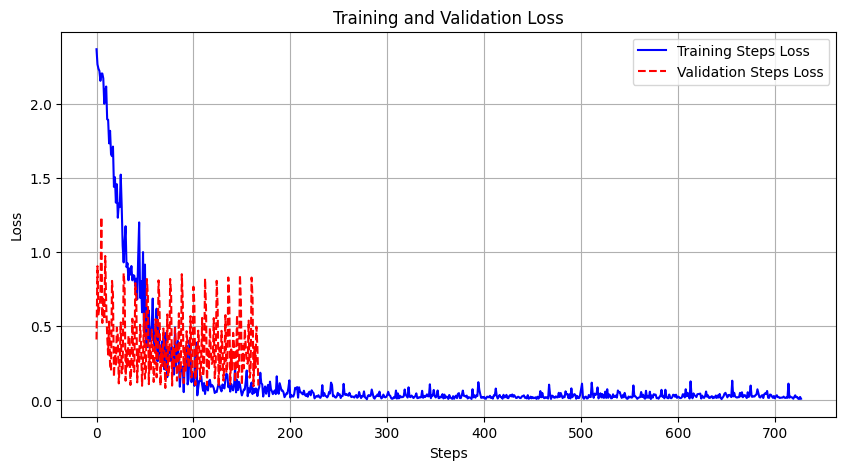

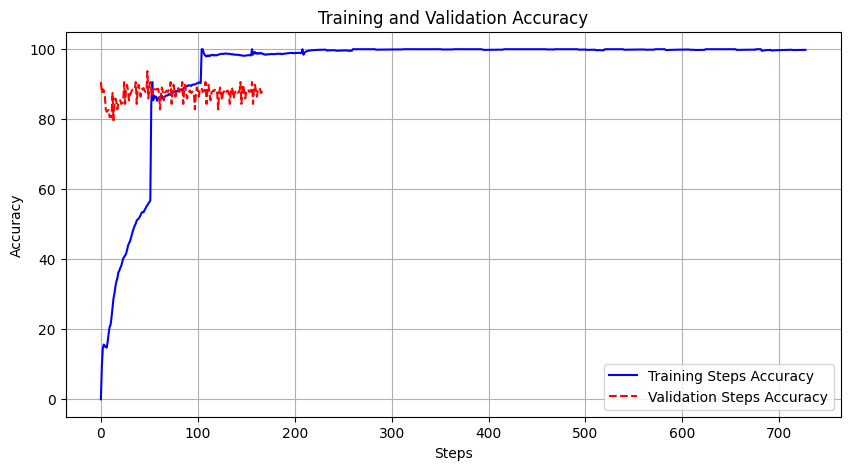

In [9]:
helper.plot_loss(loss_accuracy_metrics, use_batch_steps=True, save_path=RESULT_DIR)
helper.plot_accuracy(loss_accuracy_metrics, use_batch_steps=True, save_path=RESULT_DIR)

### Learning Rate

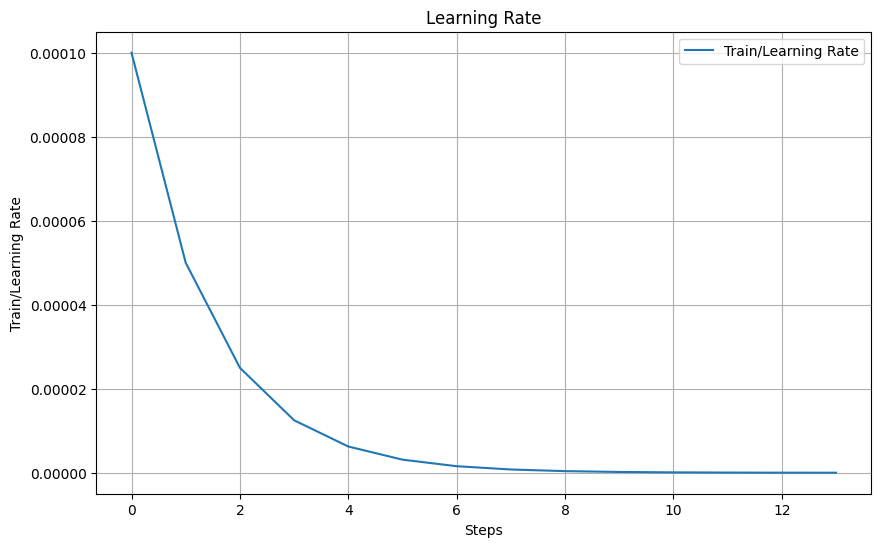

In [10]:
helper.plot_scalar_metric(LOG_DIR, 'Train/Learning Rate', 'Learning Rate', RESULT_DIR)

### Compare all models

In [11]:
model_types = ['alexnet', 'resnet', 'vgg16', 'densenet', 'efficientnet'] 
result_folder = os.path.join(BASELINE_DIR, 'comparison_results')

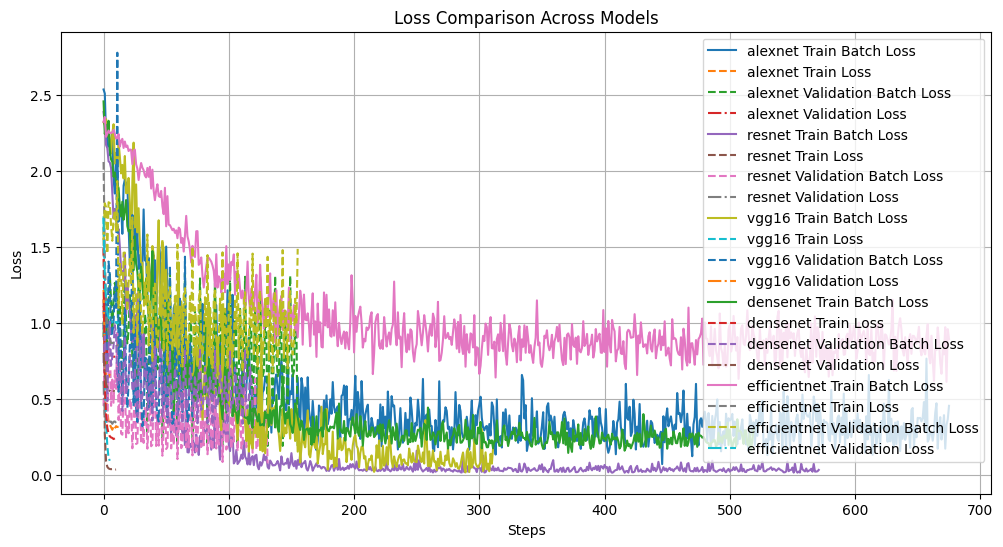

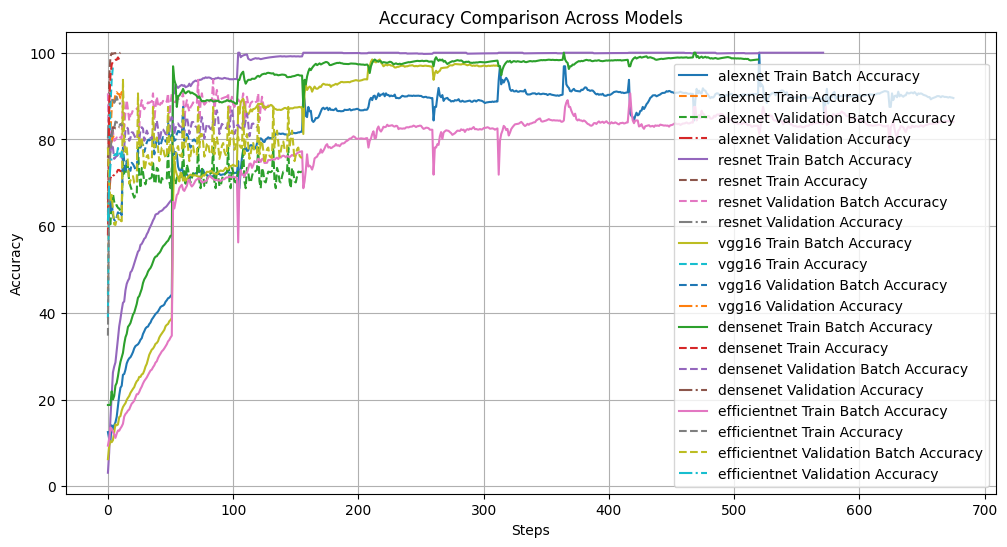

In [12]:
helper.compare_models(BASELINE_DIR, model_types, result_folder)